<a href="https://colab.research.google.com/github/TrKer1121/AI_HomeWork/blob/main/CNN_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import các thư viện
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
import pandas as pd
import cv2
import pickle

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization,  Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.linear_model import Perceptron
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets
from keras.models import load_model
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100

In [3]:
#Load và phân chia Data
(x_train,y_train),(x_test,y_test) = datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
#Tạo model
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [5]:
#Training
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 128, epochs = 20,verbose = 1, validation_data =(x_test,y_test))

Epoch 1/20
469/469 [==============================] - 164s 347ms/step - loss: 1.4295 - accuracy: 0.4514 - val_loss: 0.6332 - val_accuracy: 0.7649
Epoch 2/20
469/469 [==============================] - 162s 345ms/step - loss: 0.7800 - accuracy: 0.7087 - val_loss: 0.5049 - val_accuracy: 0.8064
Epoch 3/20
469/469 [==============================] - 161s 344ms/step - loss: 0.6543 - accuracy: 0.7568 - val_loss: 0.4529 - val_accuracy: 0.8282
Epoch 4/20
469/469 [==============================] - 161s 344ms/step - loss: 0.5882 - accuracy: 0.7826 - val_loss: 0.4052 - val_accuracy: 0.8498
Epoch 5/20
469/469 [==============================] - 161s 343ms/step - loss: 0.5538 - accuracy: 0.7975 - val_loss: 0.3918 - val_accuracy: 0.8594
Epoch 6/20
469/469 [==============================] - 161s 343ms/step - loss: 0.5244 - accuracy: 0.8092 - val_loss: 0.3631 - val_accuracy: 0.8655
Epoch 7/20
469/469 [==============================] - 161s 343ms/step - loss: 0.5017 - accuracy: 0.8190 - val_loss: 0.3578 -

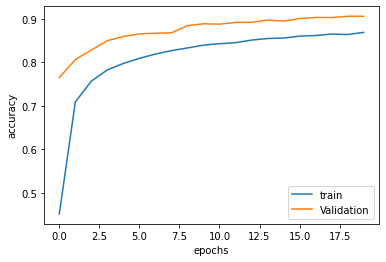

In [8]:
#đánh giá
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [10]:
model.save('CNN_Fashion.h5')